In [1]:
num_dataset = 5 # number of dataset
results = {
    'ECG': [], 
    'PPG': [], 
    'resp': [],
    # 'ECG_PPG': [],
    # 'ECG_resp': [],
    # 'PPG_resp': [],
    'all': [], 
    'late-fusion': []
}

for signal_name in results.keys():
    for n in range(1, num_dataset+1):
        with open(f'results/{signal_name}-dataset-{n}-accuracy.txt', 'r') as f: results[signal_name].append(float(f.read()))
# results

In [2]:
import numpy as np
signal_name_map = {
    'ECG': 'ECG', 
    'PPG': 'PPG', 
    'resp': 'Resp',
    # 'ECG_PPG': 'ECG+PPG',
    # 'ECG_resp': 'ECG+Resp',
    # 'PPG_resp': 'PPG+Resp',
    'all': 'ECG+PPG+Resp',
    'late-fusion': 'Late Fusion'
}

signals = signal_name_map.keys()
signal_labels = signal_name_map.values()
accuracies = []
std_devs = []

for key in signals:
    accuracies.append(np.average(results[key]))
    std_devs.append(np.std(results[key]))
std_devs

[np.float64(0.05303471456133191),
 np.float64(0.04467600707886053),
 np.float64(0.007622160322011813),
 np.float64(0.02145958905049867),
 np.float64(0.036737242683685445)]

/home/mislam8/shumona/thesis/env/lib/python3.10/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


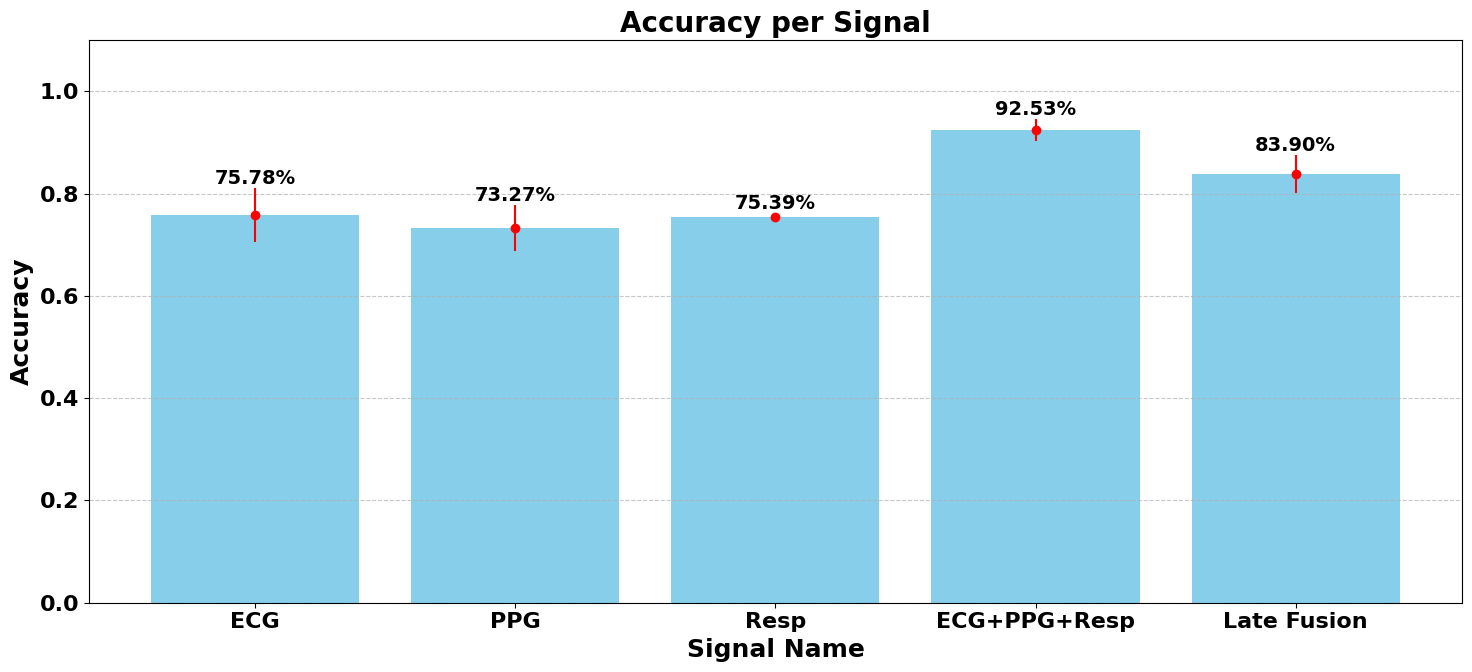

In [3]:
import matplotlib.pyplot as plt

# Set global font size and weight
plt.rcParams.update({
    'font.size': 16,  # Global font size for everything
    'font.weight': 'bold',  # Global font weight for everything
    'axes.titlesize': 20,  # Title font size
    'axes.titleweight': 'bold',  # Title font weight
    'axes.labelsize': 18,  # Axis labels font size
    'axes.labelweight': 'bold',  # Axis labels font weight
    'xtick.labelsize': 16,  # X-axis ticks font size
    'ytick.labelsize': 16,  # Y-axis ticks font size
    'legend.fontsize': 16  # Legend font size
})

# Plotting
plt.figure(figsize=(15, 7))
bar_width = 0.8  # Smaller than default (which is 0.8)
bars = plt.bar(signal_labels, accuracies, width=bar_width, color='skyblue')
plt.errorbar(signal_labels, accuracies, yerr=std_devs,  fmt="o", color="r")
plt.ylim(0, 1.1)
plt.ylabel('Accuracy')
plt.xlabel('Signal Name')
plt.title('Accuracy per Signal')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top
for bar, acc, std_dev in zip(bars, accuracies, std_devs):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + std_dev, f'{acc*100:.2f}%', 
             ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
# plt.savefig('figures/accuracy-late-fusion.eps', format='eps')
plt.savefig('figures/accuracy-late-fusion.pdf', format='pdf')
plt.show()
